**Background and Context**

Businesses, including banks, face the challenge of customer churn, which refers to customers leaving one service provider and joining another. To address this issue, it is important for businesses to understand the factors that influence a customer's decision to leave. By identifying these factors, management can focus on improving the service in the areas that matter most to customers.

**Objective**

Create a neural network-based classifier that can accurately predict whether a bank customer will churn (leave) or not. This classifier will enable the bank to proactively identify customers who may be at risk of churning and take appropriate measures to retain them, ultimately helping the bank to retain customers and mitigate customer churn.

**About Dataset**

**RowNumber:** Corresponds to the record (row) number and has no effect on the output.

**CustomerId:** Contains random values and has no effect on customer leaving the bank.

**Surname:** The surname of a customer has no impact on their decision to leave the bank.

**CreditScore:** Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography:** A customer’s location can affect their decision to leave the bank.

**Gender:** It’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age:** This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure:** Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance:** Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts:** Refers to the number of products that a customer has purchased through the bank.

**HasCrCard:** Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember:** Active customers are less likely to leave the bank.

**EstimatedSalary:** As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited:** Whether or not the customer left the bank.

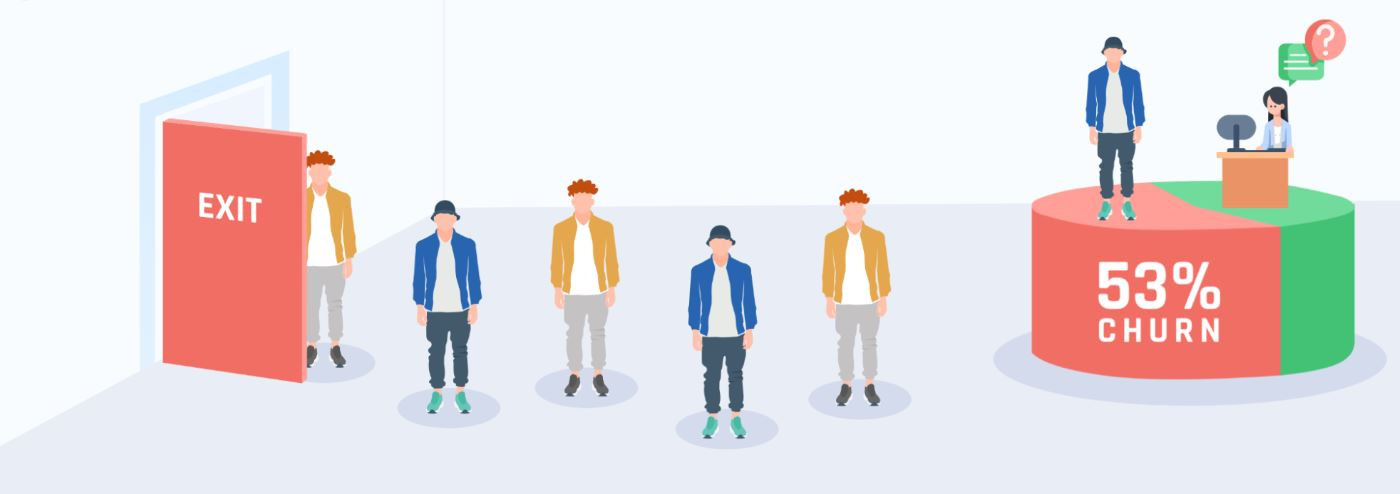

# Keras Classification

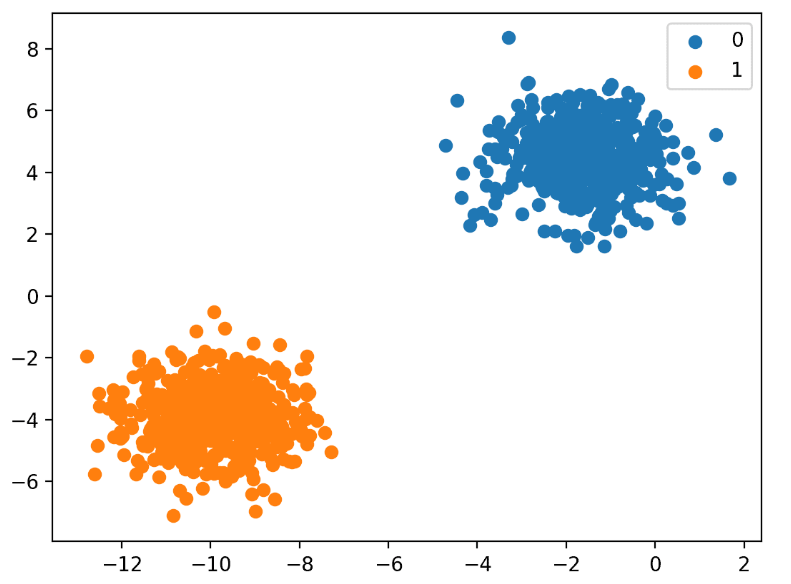

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("churn.csv", index_col='RowNumber')
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,5,GOLD,425


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [5]:
df.shape

(10000, 17)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

Exited
0    7962
1    2038
Name: count, dtype: int64


KeyError: 0

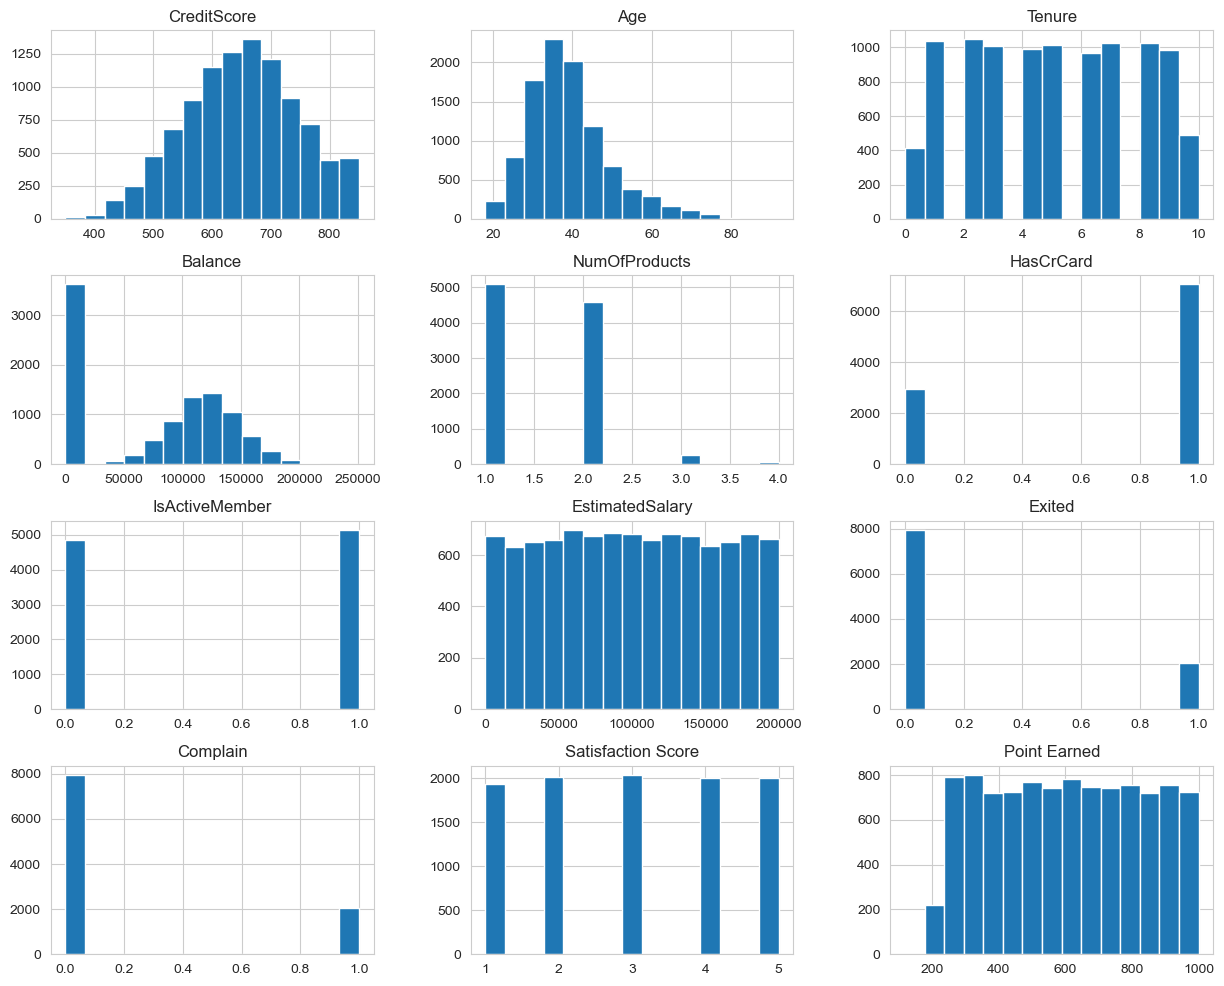

In [11]:
df.hist(figsize=(15, 12), bins=15);

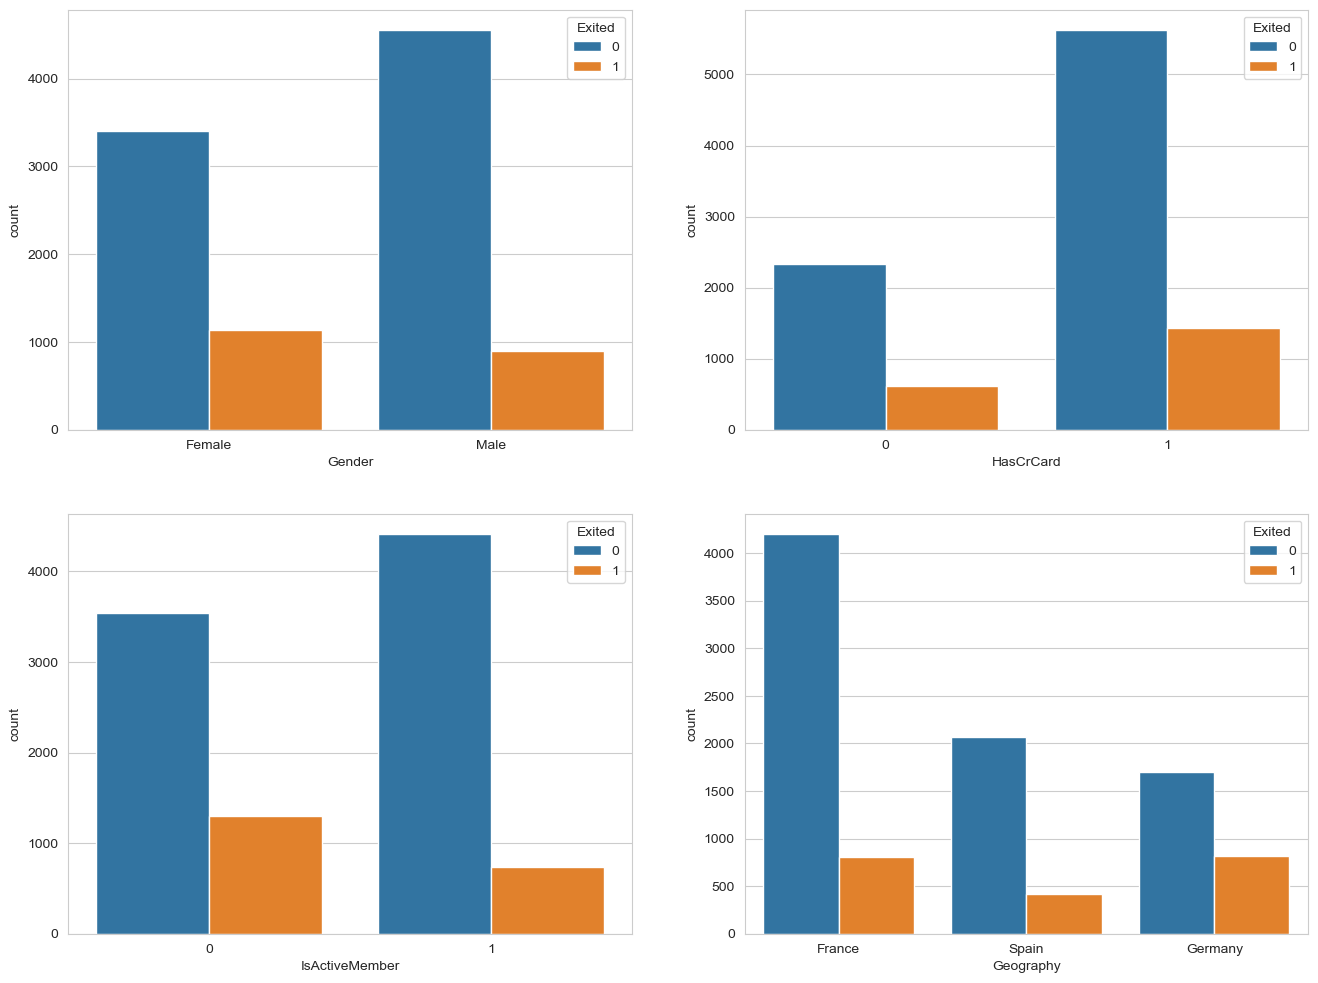

In [12]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

In [13]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:>

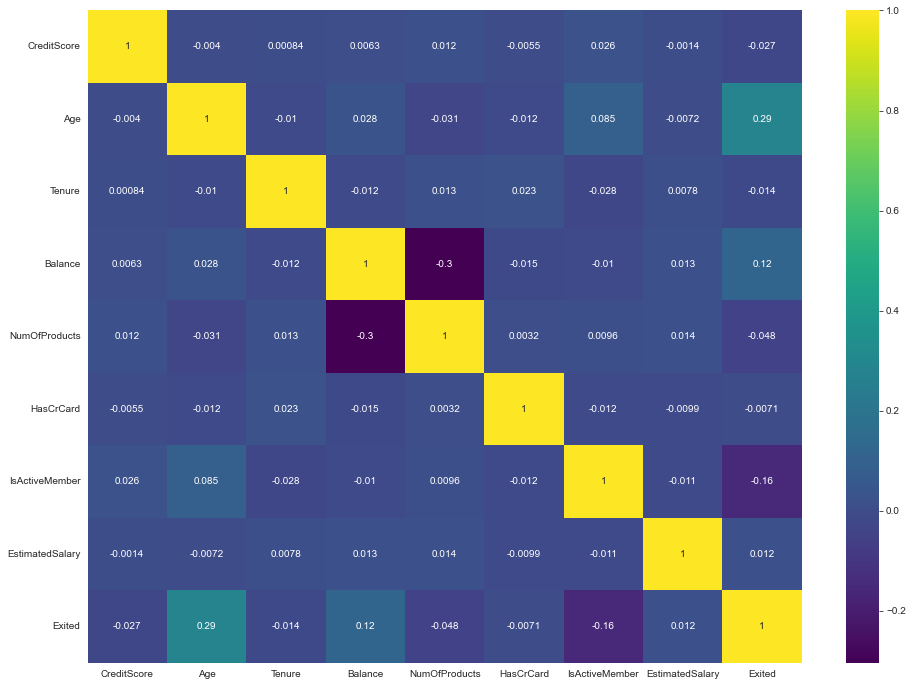

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [14]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

ValueError: could not convert string to float: 'France'

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
RowNumber,,,,,,,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,1,2,464,False,False,False,False,False,False
2,608,41,1,83807.860,1,0,1,112542.580,0,1,3,456,False,True,False,False,False,False
3,502,42,8,159660.800,3,1,0,113931.570,1,1,3,377,False,False,False,False,False,False
4,699,39,1,0.000,2,0,0,93826.630,0,0,5,350,False,False,False,True,False,False
5,850,43,2,125510.820,1,1,1,79084.100,0,0,5,425,False,True,False,True,False,False


## Preprocessing of Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [18]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

**How many hidden layers should I use?**

[source 01](http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html)
[source 02](http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
[source 03](http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html)
[source 04](http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
[source 05](https://www.researchgate.net/post/What_is_genetic_algorithm1)
[source 06](http://francky.me/doc/mrf2011-HEC-ISIR-ENS_en.pdf)

### without class_weigth

In [20]:
X_train.shape

(9000, 17)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))    # add the input layer and the first hidden layer
model.add(Dense(8, activation="relu"))     # add the second hidden layer
model.add(Dense(1, activation="sigmoid"))   # add the output layer

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])    # loss function and metrics

# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 

In [24]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=25)
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [25]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=10,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/10
64/64 [==============================] - 2s 8ms/step - loss: 0.6289 - recall: 0.0652 - val_loss: 0.5234 - val_recall: 0.0000e+00
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4641 - recall: 0.0000e+00 - val_loss: 0.3972 - val_recall: 0.0000e+00
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.3465 - recall: 0.0399 - val_loss: 0.2735 - val_recall: 0.2584
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2254 - recall: 0.5990 - val_loss: 0.1677 - val_recall: 0.8764
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1312 - recall: 0.9505 - val_loss: 0.0920 - val_recall: 0.9944
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0712 - recall: 0.9958 - val_loss: 0.0508 - val_recall: 1.0000
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0413 - recall: 0.9982 - val_loss: 0.0312 - val_recall: 1.0000
Epoch 8/10
64/64 [==================

In [26]:
model.summary()  # summary of the model, how many layers, how many nodes in each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.629,0.065,0.523,0.000
1,0.464,0.000,0.397,0.000
2,0.346,0.040,0.273,0.258
3,0.225,0.599,0.168,0.876
4,0.131,0.950,0.092,0.994


<Axes: >

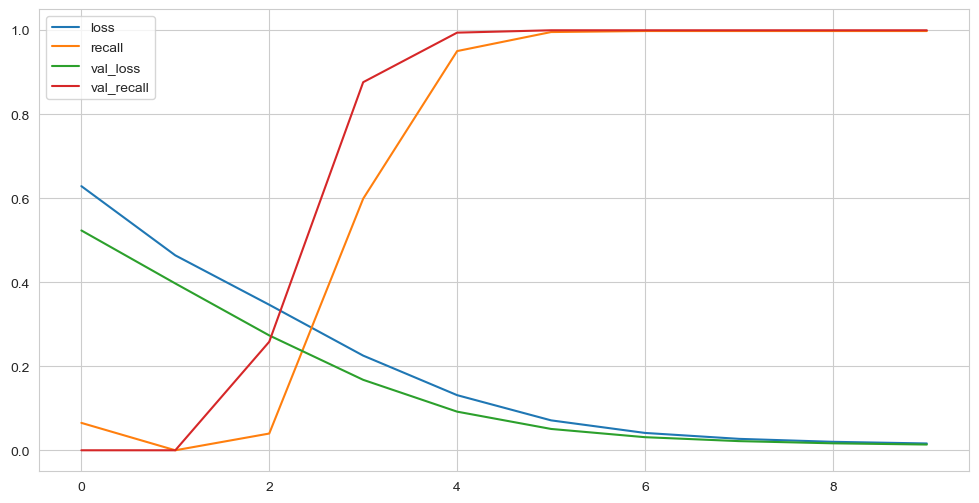

In [28]:
loss_df.plot()  # loss function history for each epoch

In [29]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[795   1]
 [  1 203]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       204

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



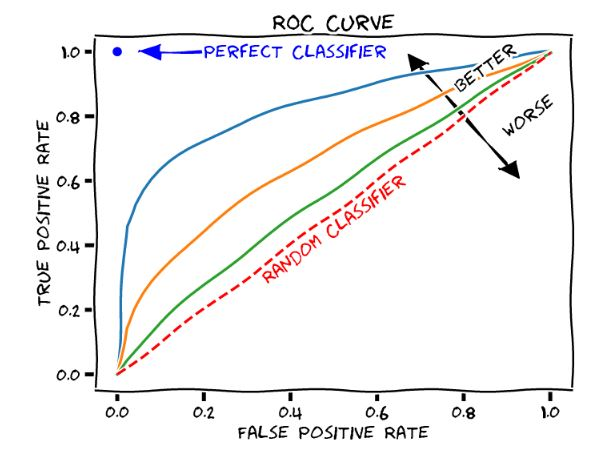

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 3ms/step


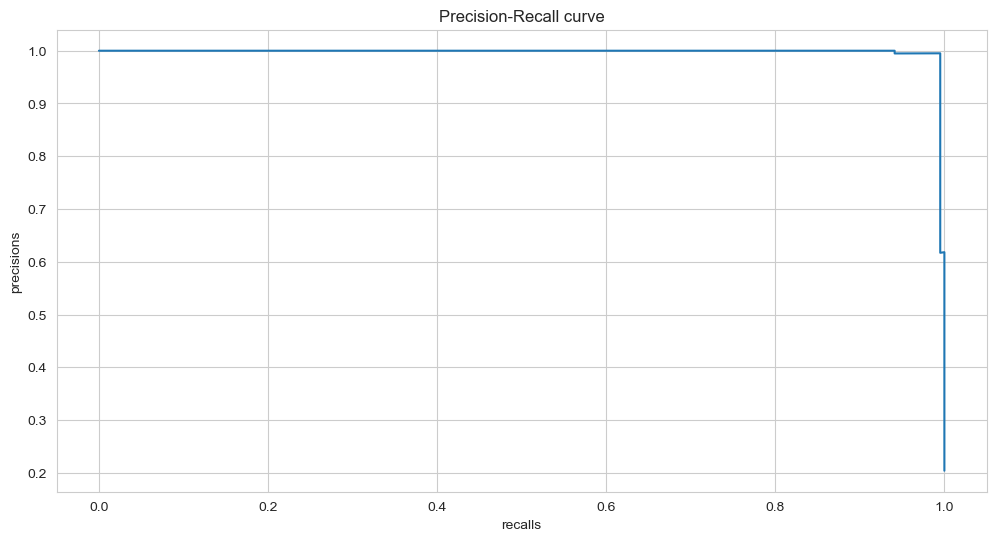

In [30]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [31]:
average_precision_score(y_test, y_pred_proba)

0.9978573111356133

### with class_weigth

In [32]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [33]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279653921295004, 1: 2.4536532170119956}

In [34]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=10,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/10
64/64 [==============================] - 1s 7ms/step - loss: 0.6878 - recall: 0.8170 - val_loss: 0.6970 - val_recall: 0.9775
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.6196 - recall: 0.9541 - val_loss: 0.5356 - val_recall: 0.9157
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4590 - recall: 0.9867 - val_loss: 0.3642 - val_recall: 0.9831
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.2944 - recall: 0.9964 - val_loss: 0.2271 - val_recall: 1.0000
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.1703 - recall: 0.9982 - val_loss: 0.1264 - val_recall: 1.0000
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0961 - recall: 0.9982 - val_loss: 0.0743 - val_recall: 1.0000
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.0573 - recall: 0.9982 - val_loss: 0.0454 - val_recall: 1.0000
Epoch 8/10
64/64 [==============================

<Axes: >

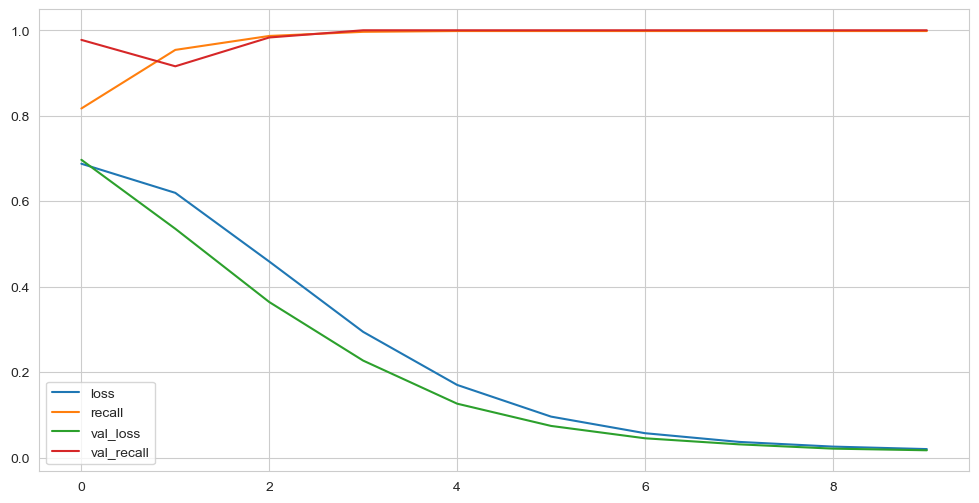

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [36]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


32/32 [==============================] - 0s 2ms/step
[[795   1]
 [  1 203]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       204

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



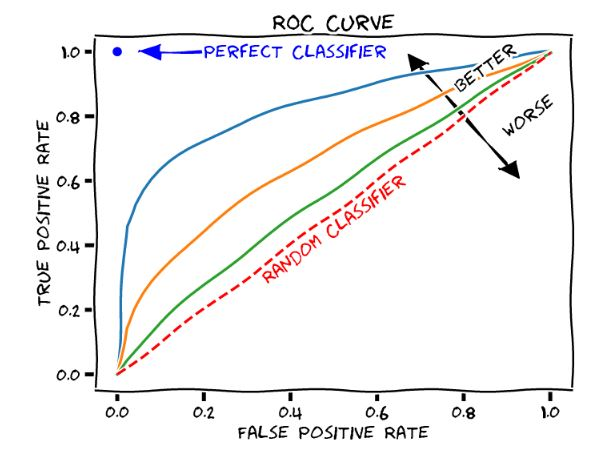

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 2ms/step


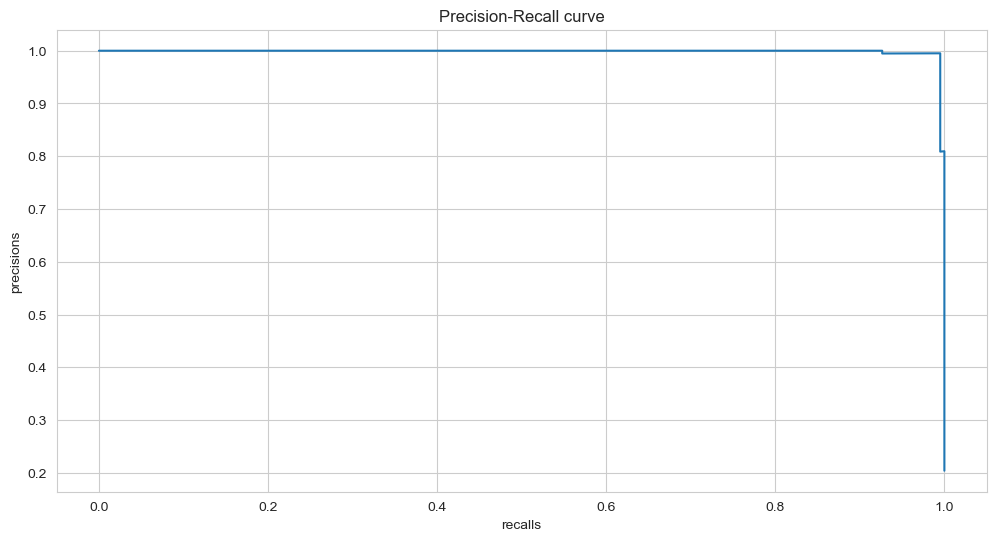

In [37]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [38]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.9987186675511237

## Final Model and Model Deployment

In [123]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [39]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=10,
          verbose=1,
          class_weight=class_weights)    
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/10
36/36 [==============================] - 1s 10ms/step - loss: 0.7578 - recall: 0.2028 - val_loss: 0.6583 - val_recall: 0.5245
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.6299 - recall: 0.7377 - val_loss: 0.6109 - val_recall: 0.7941
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.5266 - recall: 0.8397 - val_loss: 0.4338 - val_recall: 0.8382
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3742 - recall: 0.9111 - val_loss: 0.2729 - val_recall: 0.9706
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.2189 - recall: 0.9891 - val_loss: 0.1558 - val_recall: 0.9951
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1194 - recall: 0.9978 - val_loss: 0.0898 - val_recall: 0.9951
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0700 - recall: 0.9984 - val_loss: 0.0560 - val_recall: 0.9951
Epoch 8/10
36/36 [=============================

<Axes: >

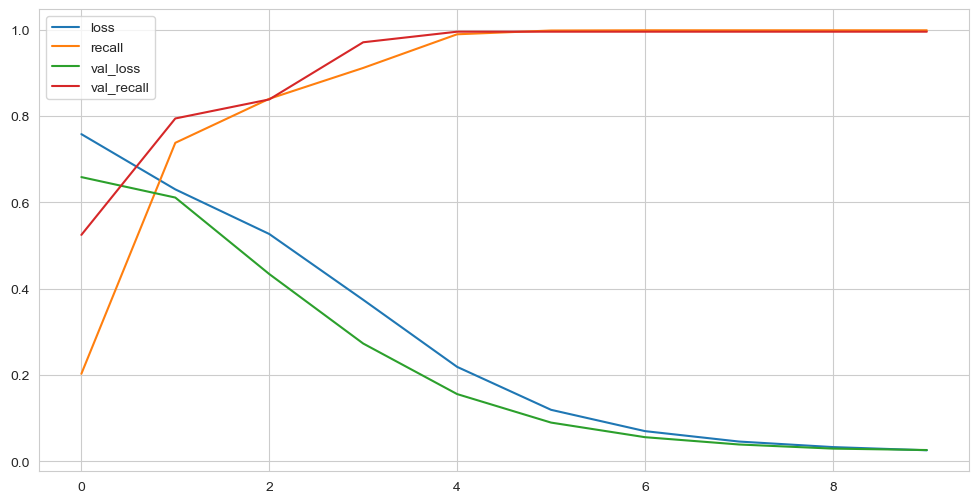

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [41]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.026257997378706932
recall :  0.9950980544090271


In [42]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[795   1]
 [  1 203]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       204

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [128]:
model.save('model_churn.h5')

# "h5" dosya uzantısı, Hierarchical Data Format (HDF) adı verilen bir dosya formatını ifade eder. 
# HDF, büyük ve karmaşık verileri depolamak, paylaşmak ve işlemek için kullanılan bir veri yönetim standardıdır.

### Prediction

In [129]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [130]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [131]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[1]])

In [132]:
df["Exited"].iloc[0]

1

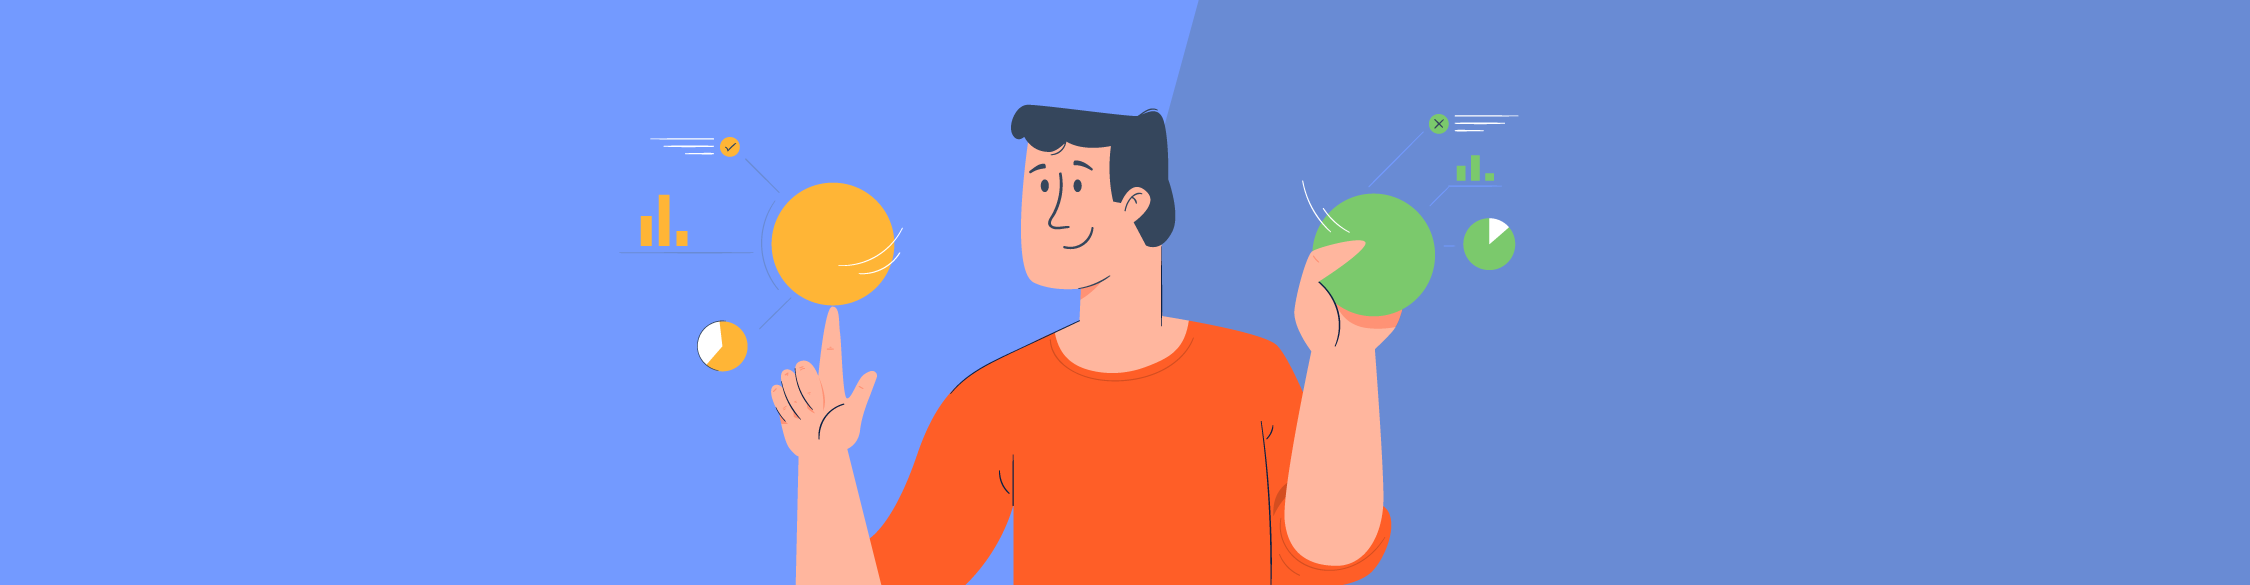

## Comparison with ML

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier


In [136]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       796
           1       0.69      0.39      0.50       204

    accuracy                           0.84      1000
   macro avg       0.78      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000

